In [1]:
import os
from github import Github
from dotenv import load_dotenv
import networkx as nx
import csv
import numpy as np

# Create an empty graph
graph = nx.Graph()

In [2]:
# Open the CSV file and read the data for users
with open('dataset/users.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue
        # transform the string of repositories into an array of strings
        row[2] = [x for x in row[2].replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').split(',')]
        # Add the user node to graph with blue color
        graph.add_node(row[0], name=row[1], repos=row[2], color="#7FB2FD")

In [3]:
# Open the CSV file and read the data for repositories
with open('dataset/repos.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        if i == 0: # Skip the header columns
            continue

        # transform the string of languages into an array of strings
        row[2] = [x for x in row[2].replace(' ', '').replace('[', '').replace(']', '').replace('\'', '').split(',')]

        # Add the repository node to graph with pink color
        graph.add_node(row[0], name=row[1], languages=row[2], color="#FF8CCD")


In [4]:
# Add edges between users and repositories based on the users' list of repositories
for node in graph.nodes:
    # if it's a user node
    if node[0] == "u":
        # for each repository in the user's list of repositories
        for repo in graph.nodes[node]['repos']:
            # add an edge between the user and the repository
            graph.add_edge(node, repo)

In [5]:
# Print the number of nodes and edges
print("Number of nodes:", graph.number_of_nodes())
print("Number of edges:", graph.number_of_edges())

Number of nodes: 4358
Number of edges: 4908


In [6]:
# Draw the graph using color property to distinguish users and repositories
# nx.draw(graph, node_color=[graph.nodes[node]['color'] for node in graph.nodes], node_size=100)

In [7]:
# Calculate the degree centrality of all nodes
degree_centrality = nx.degree_centrality(graph)

# Split the degree centrality for users and repositories
users_degree_centrality = { k: v for k, v in degree_centrality.items() if k.startswith('u_')}
repos_degree_centrality = { k: v for k, v in degree_centrality.items() if k.startswith('r_')}

# Print the degree centrality of first 10 users in descending order
print("\nDegree centrality of first 10 users in descending order:")
for node in sorted(users_degree_centrality, key=users_degree_centrality.get, reverse=True)[:10]:
    print(node, users_degree_centrality[node])

# Print mean degree centrality for users
print("\nMean degree centrality for users:", sum(users_degree_centrality.values())/len(users_degree_centrality))




Degree centrality of first 10 users in descending order:
u_938 0.006196924489327519
u_3005 0.005737893045673629
u_1038 0.004360798714711958
u_2293 0.0034427358274041774
u_1755 0.003213220105577232
u_3269 0.003213220105577232
u_1055 0.002754188661923342
u_2137 0.002754188661923342
u_3002 0.002754188661923342
u_3056 0.002754188661923342

Mean degree centrality for users: 0.0003349578241827771


In [8]:
# Print the degree centrality of first 10 repositories in descending order
print("\nDegree centrality of first 10 repositories in descending order:")
for node in sorted(repos_degree_centrality, key=repos_degree_centrality.get, reverse=True)[:5]:
    print(node, repos_degree_centrality[node])

# Print mean degree centrality for repositories
print("\nMean degree centrality for repositories:", sum(repos_degree_centrality.values())/len(repos_degree_centrality))




Degree centrality of first 10 repositories in descending order:
r_415 0.08836355290337389
r_281 0.08652742712875833
r_444 0.07183842093183383
r_528 0.039935735597888454
r_244 0.030525591002983705

Mean degree centrality for repositories: 0.0011321237816348294


{'u_938': Text(-0.10762984826398474, 0.3887439267799123, 'u_938'),
 'u_3005': Text(0.16664780787597508, 0.01019962055153626, 'u_3005'),
 'u_1038': Text(-0.419884411052235, 0.06814972709642286, 'u_1038'),
 'u_2293': Text(0.08317392420594195, -0.2890478722175517, 'u_2293'),
 'u_1755': Text(0.40664602996886523, 0.31984792169691795, 'u_1755'),
 'u_3269': Text(-0.3010616614693246, -0.2638984546324221, 'u_3269'),
 'u_1055': Text(0.20664289445441827, 0.4632281273409393, 'u_1055'),
 'u_2137': Text(-0.19488610293247047, -0.4121165040297548, 'u_2137'),
 'u_3002': Text(-0.40943561336807655, -0.08828952533509656, 'u_3002'),
 'u_3056': Text(0.6937752473274432, -0.4105907788386684, 'u_3056')}

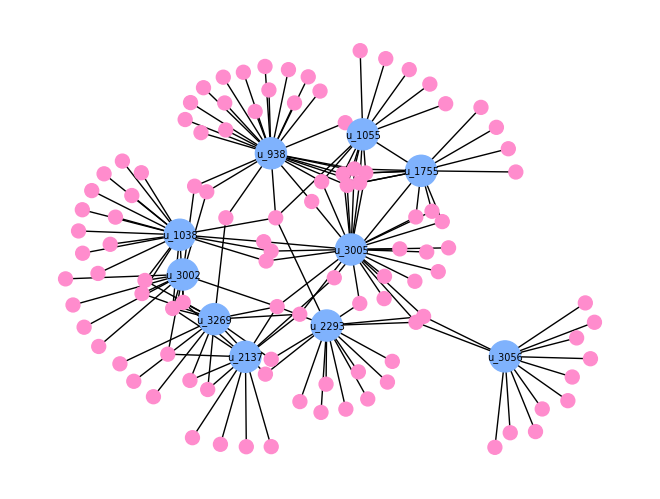

In [9]:
# Draw the graph containing only the top 10 users with neighbours based on degree centrality
users_subgraph = nx.Graph()
for node in sorted(users_degree_centrality, key=users_degree_centrality.get, reverse=True)[:10]:
    users_subgraph.add_node(node, color=graph.nodes[node]['color'])
    for neighbour in graph.neighbors(node):
        if neighbour[0] == "u":
            users_subgraph.add_node(neighbour, color=graph.nodes[neighbour]['color'])
        else:
            users_subgraph.add_node(neighbour, color=graph.nodes[neighbour]['color'])
        users_subgraph.add_edge(node, neighbour)

pos = nx.kamada_kawai_layout(users_subgraph)
node_sizes = [500 if node.startswith('u_') else 100 for node in users_subgraph.nodes]
nx.draw(users_subgraph, pos, node_size=node_sizes, node_color=[users_subgraph.nodes[node]['color'] for node in users_subgraph.nodes])
labels = {node: node for node in users_subgraph.nodes if node.startswith('u_')}
nx.draw_networkx_labels(users_subgraph, pos, labels, font_size=7)

{'r_415': Text(0.41872120730262313, -0.3857526157243101, 'r_415'),
 'r_281': Text(0.7684116028171722, 0.2321772608147805, 'r_281'),
 'r_444': Text(-0.44956079916729574, 0.402718005627522, 'r_444'),
 'r_528': Text(-0.7932490367415734, -0.5238411498335456, 'r_528'),
 'r_244': Text(0.09761796362604688, 0.2857241974882562, 'r_244')}

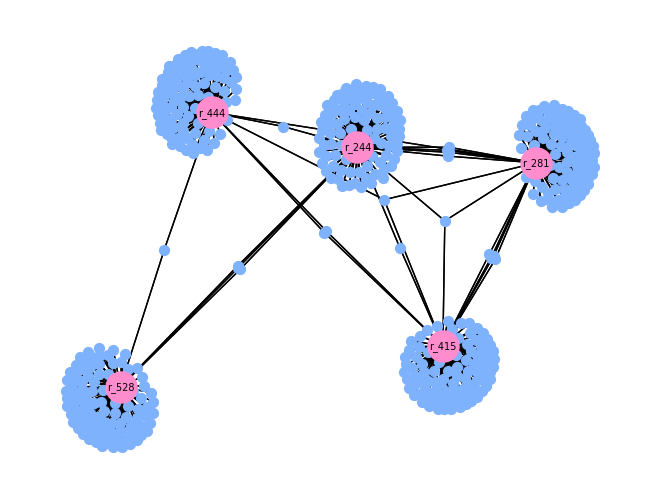

In [10]:
# Draw the graph containing only the top 10 repositories with neighbours based on degree centrality
repos_subgraph = nx.Graph()
for node in sorted(repos_degree_centrality, key=repos_degree_centrality.get, reverse=True)[:5]:
    repos_subgraph.add_node(node, color=graph.nodes[node]['color'])
    i = 0
    for i, neighbour in enumerate(graph.neighbors(node)):
        if i < 100:
            repos_subgraph.add_node(neighbour, color=graph.nodes[neighbour]['color'])
            repos_subgraph.add_edge(node, neighbour)
            i += 1

pos = nx.spring_layout(repos_subgraph, k=0.05)   

repos_subgraph_users = [node for node in repos_subgraph.nodes if node.startswith('u_')]
repos_subgraph_repos = [node for node in repos_subgraph.nodes if node.startswith('r_')]
# Draw all "u_" nodes
nx.draw(repos_subgraph, pos, node_size=50,node_color='#7FB2FD', nodelist=repos_subgraph_users)

# Draw all "r_" nodes
nx.draw(repos_subgraph, pos, node_size=500, node_color='#FF8CCD', nodelist=repos_subgraph_repos)

labels = {node: node for node in repos_subgraph.nodes if node.startswith('r_')}
nx.draw_networkx_labels(repos_subgraph, pos, labels, font_size=7)


In [11]:
# Calculate the betweenness centrality of all nodes
betweenness_centrality = nx.betweenness_centrality(graph)

# Calculate the betweenness centrality of users nodes
users_betweenness_centrality = { k: v for k, v in betweenness_centrality.items() if k.startswith('u_')}

In [12]:

# Print the betweenness centrality of first 10 users in descending order
for node, centrality in sorted(users_betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
    print("Node", node, "has betweenness centrality", centrality)

# Print mean betweenness centrality for users
print("\nMean betweenness centrality for users:", sum(users_betweenness_centrality.values())/len(users_betweenness_centrality))



Node u_2137 has betweenness centrality 0.02824135954815654
Node u_3005 has betweenness centrality 0.023221555638119135
Node u_2306 has betweenness centrality 0.020885299118275896
Node u_2569 has betweenness centrality 0.015061229261048718
Node u_2372 has betweenness centrality 0.015040646051460736
Node u_316 has betweenness centrality 0.014308892371150376
Node u_2163 has betweenness centrality 0.013970741769510851
Node u_114 has betweenness centrality 0.013839056771776832
Node u_938 has betweenness centrality 0.013531946101821223
Node u_1373 has betweenness centrality 0.01300389826035537

Mean betweenness centrality for users: 0.0003013580225779267


{'u_2137': Text(0.5807464171044158, 0.22828574562859716, 'u_2137'),
 'u_3005': Text(-0.06825577022088815, 0.23171631190458153, 'u_3005'),
 'u_2306': Text(0.013167253502760896, 0.1057429027042898, 'u_2306'),
 'u_2569': Text(-0.37426610602028626, -0.455100631663197, 'u_2569'),
 'u_2372': Text(0.3195958221094785, -0.37691133121424775, 'u_2372'),
 'u_316': Text(0.6949063231593838, 0.7721329982660422, 'u_316'),
 'u_2163': Text(0.29239052713188707, -0.027949140315532195, 'u_2163'),
 'u_114': Text(-0.40036086567687346, -0.056581567194196186, 'u_114'),
 'u_938': Text(-0.4037763063914363, -0.2565817019158958, 'u_938'),
 'u_1373': Text(0.050993846654608044, -0.35641060444799516, 'u_1373')}

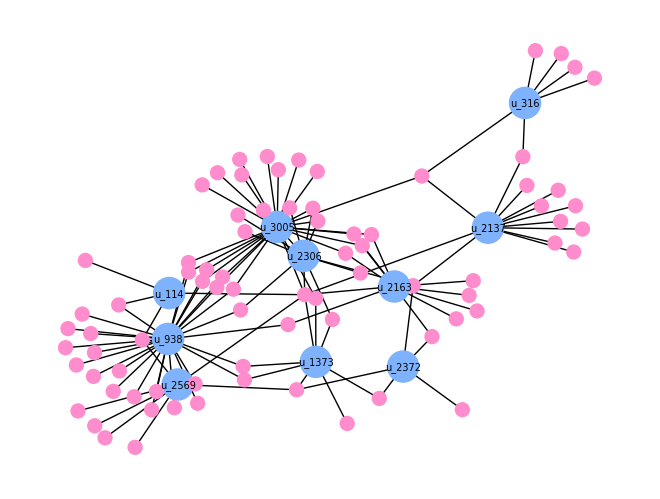

In [13]:
# Draw the graph containing only the top 10 users with neighbours based on betweenness centrality
users_subgraph = nx.Graph()
for node in sorted(users_betweenness_centrality, key=users_betweenness_centrality.get, reverse=True)[:10]:
    users_subgraph.add_node(node, color=graph.nodes[node]['color'])
    for neighbour in graph.neighbors(node):
        if neighbour[0] == "u":
            users_subgraph.add_node(neighbour, color=graph.nodes[neighbour]['color'])
        else:
            users_subgraph.add_node(neighbour, color=graph.nodes[neighbour]['color'])
        users_subgraph.add_edge(node, neighbour)

pos = nx.spring_layout(users_subgraph, k=0.05)
node_sizes = [500 if node.startswith('u_') else 100 for node in users_subgraph.nodes]
nx.draw(users_subgraph, pos, node_size=node_sizes, node_color=[users_subgraph.nodes[node]['color'] for node in users_subgraph.nodes])
labels = {node: node for node in users_subgraph.nodes if node.startswith('u_')}
nx.draw_networkx_labels(users_subgraph, pos, labels, font_size=7)

In [14]:
# Calculate the eigenvector centrality of all nodes
eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=1000)

# Calculate the eigenvector centrality of repos nodes
repos_eigenvector_centrality = { k: v for k, v in eigenvector_centrality.items() if k.startswith('r_')}

# Calculate the eigenvector centrality of users nodes
users_eigenvector_centrality = { k: v for k, v in eigenvector_centrality.items() if k.startswith('u_')}

# Print the eigenvector centrality of first 10 repos in descending order
print("\nEigenvector centrality of first 10 repositories in descending order:")
for node, centrality in sorted(repos_eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:4]:
    print("Repository", node, "has eigenvector centrality", centrality)

# Print mean eigenvector centrality for users
print("\nMean eigenvector centrality for users:", sum(users_eigenvector_centrality.values())/len(users_eigenvector_centrality))


# Print the eigenvector centrality of first 10 users in descending order
print("\nEigenvector centrality of first 10 users in descending order:")
for node, centrality in sorted(users_eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]:
    print("User", node, "has eigenvector centrality", centrality)

# Print mean eigenvector centrality for repos
print("\nMean eigenvector centrality for repos:", sum(repos_eigenvector_centrality.values())/len(repos_eigenvector_centrality))


Eigenvector centrality of first 10 repositories in descending order:
Repository r_281 has eigenvector centrality 0.5254865612611622
Repository r_415 has eigenvector centrality 0.43597367689617333
Repository r_444 has eigenvector centrality 0.09221016352452223
Repository r_734 has eigenvector centrality 0.09120762268066393

Mean eigenvector centrality for users: 0.006312999286613961

Eigenvector centrality of first 10 users in descending order:
User u_2000 has eigenvector centrality 0.05946203296646967
User u_1902 has eigenvector centrality 0.05760511639840922
User u_2569 has eigenvector centrality 0.05311090014174709
User u_797 has eigenvector centrality 0.052150062179243874
User u_1373 has eigenvector centrality 0.05068638045659862
User u_3011 has eigenvector centrality 0.04971517486463556
User u_697 has eigenvector centrality 0.04919421275444078
User u_401 has eigenvector centrality 0.04821804537305101
User u_1764 has eigenvector centrality 0.047252921501199995
User u_131 has eigenv

{'u_2000': Text(-0.26224552988412825, 0.5051647089551792, 'u_2000'),
 'u_1902': Text(-0.5121420890714633, 0.18385249479847707, 'u_1902'),
 'u_2569': Text(0.40014249786810135, 0.3990031124600999, 'u_2569'),
 'u_797': Text(0.397724530079945, 0.13637984226593805, 'u_797'),
 'u_1373': Text(-0.38960232114799426, -0.5504827427767158, 'u_1373'),
 'u_3011': Text(0.5830084579623607, -0.4001168861419994, 'u_3011'),
 'u_697': Text(-0.09337101633215637, -0.3755065808752038, 'u_697'),
 'u_401': Text(0.23837371203899954, -0.32595481956949235, 'u_401'),
 'u_1764': Text(0.12195308917327688, 0.27334714013565153, 'u_1764'),
 'u_131': Text(0.04956186716218098, -0.2517956985894788, 'u_131')}

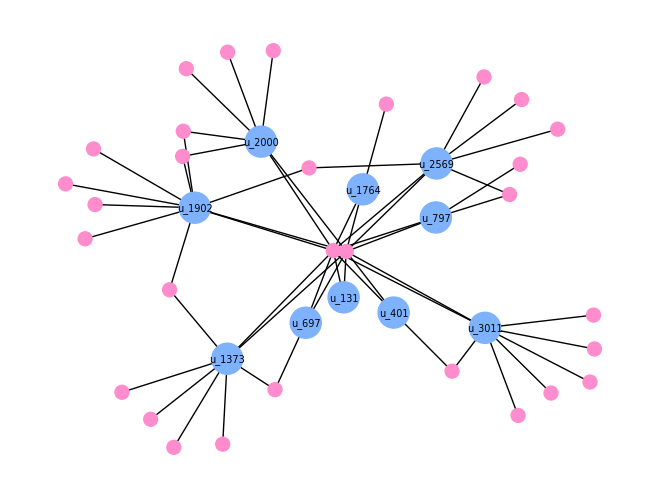

In [15]:
# Draw the graph containing only the top 10 users with neighbours based on eigenvector centrality
users_subgraph = nx.Graph()
for node in sorted(users_eigenvector_centrality, key=users_eigenvector_centrality.get, reverse=True)[:10]:
    users_subgraph.add_node(node, color=graph.nodes[node]['color'])
    for neighbour in graph.neighbors(node):
        if neighbour[0] == "u":
            users_subgraph.add_node(neighbour, color=graph.nodes[neighbour]['color'])
        else:
            users_subgraph.add_node(neighbour, color=graph.nodes[neighbour]['color'])
        users_subgraph.add_edge(node, neighbour)

pos = nx.spring_layout(users_subgraph, k=0.05)
node_sizes = [500 if node.startswith('u_') else 100 for node in users_subgraph.nodes]
nx.draw(users_subgraph, pos, node_size=node_sizes, node_color=[users_subgraph.nodes[node]['color'] for node in users_subgraph.nodes])
labels = {node: node for node in users_subgraph.nodes if node.startswith('u_')}
nx.draw_networkx_labels(users_subgraph, pos, labels, font_size=7)

{'r_281': Text(0.04316332751709129, -0.3346411377073085, 'r_281'),
 'r_415': Text(-0.2803540595548107, 0.3285239292664161, 'r_415'),
 'r_444': Text(0.5241193651663006, 0.6172006744620882, 'r_444'),
 'r_734': Text(-0.3821675124828612, -0.8196001383845241, 'r_734')}

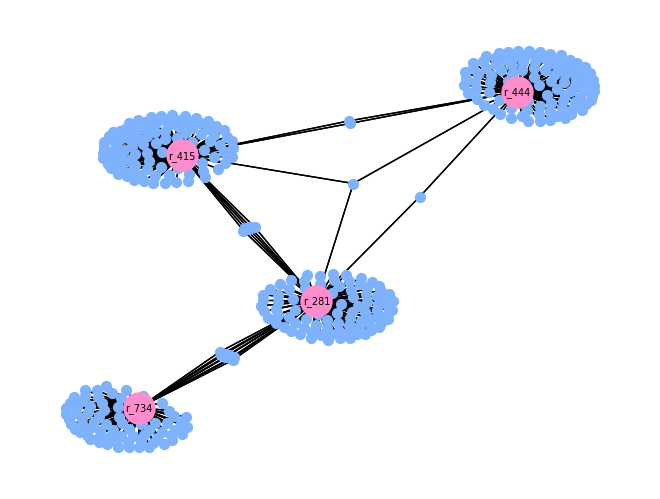

In [16]:
# Draw the graph containing only the top 10 repositories with neighbours based on eigenvector centrality
repos_subgraph = nx.Graph()
for node in sorted(repos_degree_centrality, key=repos_eigenvector_centrality.get, reverse=True)[:4]:
    repos_subgraph.add_node(node, color=graph.nodes[node]['color'])
    i = 0
    for i, neighbour in enumerate(graph.neighbors(node)):
        if i < 100:
            repos_subgraph.add_node(neighbour, color=graph.nodes[neighbour]['color'])
            repos_subgraph.add_edge(node, neighbour)
            i += 1

pos = nx.fruchterman_reingold_layout(repos_subgraph)

repos_subgraph_users = [node for node in repos_subgraph.nodes if node.startswith('u_')]
repos_subgraph_repos = [node for node in repos_subgraph.nodes if node.startswith('r_')]
# Draw all "u_" nodes
nx.draw(repos_subgraph, pos, node_size=50,node_color='#7FB2FD', nodelist=repos_subgraph_users)

# Draw all "r_" nodes
nx.draw(repos_subgraph, pos, node_size=500, node_color='#FF8CCD', nodelist=repos_subgraph_repos)

labels = {node: node for node in repos_subgraph.nodes if node.startswith('r_')}
nx.draw_networkx_labels(repos_subgraph, pos, labels, font_size=7)

In [17]:
# Calculate different subgraphs based on language of repositories
subgraphs = {}
for node in graph.nodes:
    if node[0] == "r":
        for language in graph.nodes[node]['languages']:
            if language not in subgraphs:
                subgraphs[language] = nx.Graph()
            subgraphs[language].add_node(node)
            for neighbor in graph.neighbors(node):
                subgraphs[language].add_node(neighbor)
                subgraphs[language].add_edge(node, neighbor)

In [18]:
graph_for_clustering = graph.copy()

# add edge between repositories if they have at least one common language
# for node1 in graph.nodes if node1[0] == "r"
for node1 in graph.nodes:
    if node1[0] == "r":
        for node2 in graph.nodes:
            if node2[0] == "r" and node1 != node2:
                # if the two repositories have a common user in graph
                if len(set(graph.neighbors(node1)).intersection(set(graph.neighbors(node2)))) > 0:
                    graph_for_clustering.add_edge(node1, node2)
# remove all users nodes from the graph
for node in graph.nodes:
    if node[0] == "u":
        graph_for_clustering.remove_node(node)

# Calculate the number of nodes that have at most one edge in the graph
print("Number of nodes in graph:", graph_for_clustering.number_of_nodes())
print("Number of nodes with at most one edge:", len([node for node in graph_for_clustering.nodes if graph_for_clustering.degree(node) <= 1]))

# Print the node with the highest degree
print("Node with the highest degree:", max(graph_for_clustering.nodes, key=graph_for_clustering.degree), "with degree", graph_for_clustering.degree(max(graph_for_clustering.nodes, key=graph_for_clustering.degree)))

# Create a graph containing only the nodes with at least two edges
graph_for_clustering_removed = nx.Graph()
for node in graph_for_clustering.nodes:
    if graph_for_clustering.degree(node) > 1:
        graph_for_clustering_removed.add_node(node, name=graph_for_clustering.nodes[node]['name'], color=graph_for_clustering.nodes[node]['color'], languages=graph_for_clustering.nodes[node]['languages'])
        for neighbor in graph_for_clustering.neighbors(node):
            if graph_for_clustering.degree(neighbor) > 1:
                graph_for_clustering_removed.add_node(neighbor, name=graph_for_clustering.nodes[neighbor]['name'], color=graph_for_clustering.nodes[neighbor]['color'], languages=graph_for_clustering.nodes[neighbor]['languages'])
                graph_for_clustering_removed.add_edge(node, neighbor)

# Print the number of nodes and edges in the graph
print("Number of nodes in graph:", graph_for_clustering_removed.number_of_nodes())
print("Number of edges in graph:", graph_for_clustering_removed.number_of_edges())


Number of nodes in graph: 995
Number of nodes with at most one edge: 600
Node with the highest degree: r_281 with degree 140
Number of nodes in graph: 395
Number of edges in graph: 3008


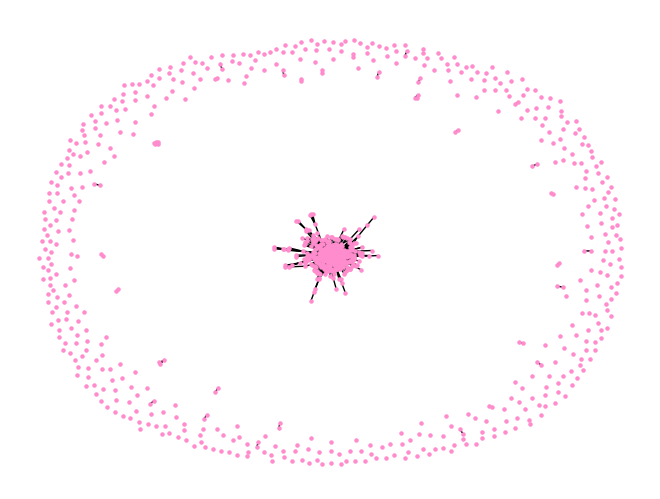

In [19]:
pos = nx.spring_layout(graph_for_clustering)
nx.draw(graph_for_clustering, pos, node_size=5,node_color='#FF8CCD')

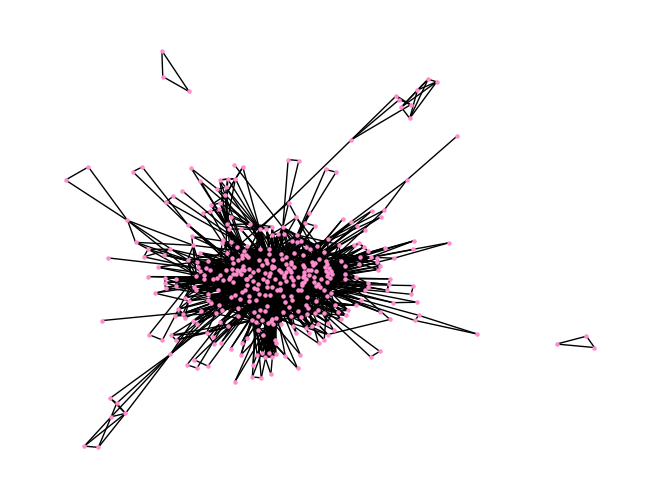

In [20]:
pos = nx.spring_layout(graph_for_clustering_removed, k=0.15)
nx.draw(graph_for_clustering_removed, pos, node_size=5,node_color='#FF8CCD')

In [21]:
# Calculate every connected component in the graph
connected_components = nx.connected_components(graph_for_clustering_removed)

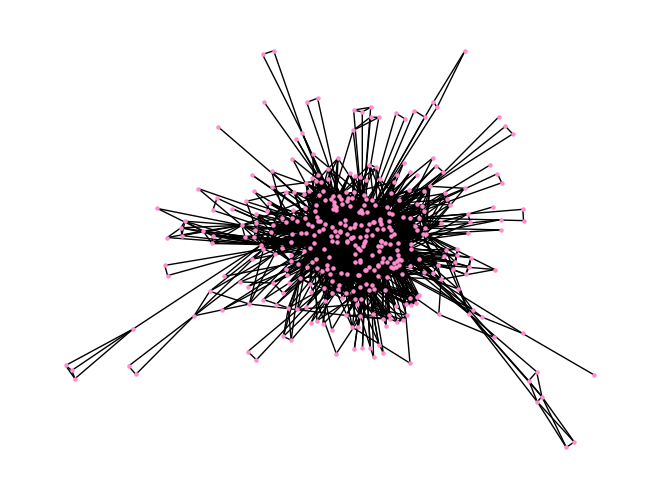

In [22]:
# Draw the largest connected component
largest_connected_component = max(connected_components, key=len)

# Draw the largest connected component
pos = nx.spring_layout(graph_for_clustering_removed.subgraph(largest_connected_component))
nx.draw(graph_for_clustering_removed.subgraph(largest_connected_component), pos, node_size=5,node_color='#FF8CCD')

In [23]:
# Create a graph for every language
graph_for_clustering_language = {}
for language in subgraphs:
    graph_for_clustering_language[language] = graph_for_clustering_removed.copy()
    for node in graph_for_clustering_removed.nodes:
        if language not in graph_for_clustering_removed.nodes[node]['languages']:
            graph_for_clustering_language[language].remove_node(node)



clustering: {'r_380': 0, 'r_679': 0.5, 'r_417': 1.0, 'r_648': 1.0, 'r_961': 1.0}
Mean clustering coefficient: 0.7


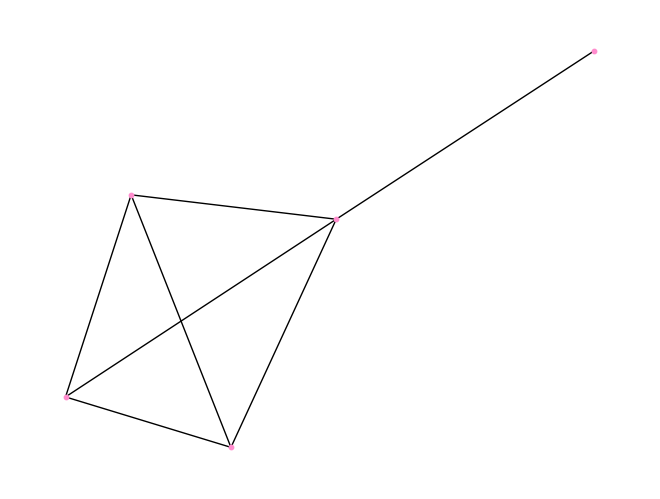

In [24]:
# Draw subgraph
language = 'Puppet'
pos = nx.spring_layout(graph_for_clustering_language[language], k=0.05)
clustering_coefficient_for_language = nx.clustering(graph_for_clustering_language[language])
print("clustering:", clustering_coefficient_for_language)

# Print the mean clustering coefficient
print("Mean clustering coefficient:", nx.average_clustering(graph_for_clustering_language[language]))
nx.draw(graph_for_clustering_language[language], pos, node_size=10, node_color='#FF8CCD')

In [25]:
# Calculate the clustering coefficient of the graph only for nodes in graph_for_clustering_tex
clustering_coefficient = {}
for language in subgraphs:
    clustering_coefficient[language] = nx.clustering(graph_for_clustering_removed, nodes=graph_for_clustering_language[language].nodes)


In [26]:
# Create an array of the clustering coefficient values for each language
clustering_coefficient_array = {}
for language in subgraphs:
    if graph_for_clustering_language[language].number_of_nodes() > 0:
        clustering_coefficient_array[language] = nx.average_clustering(graph_for_clustering_language[language])

# remove '' language from the array
del clustering_coefficient_array['']

# Print array in descending order
for language in sorted(clustering_coefficient_array, key=clustering_coefficient_array.get, reverse=True):
    print(language, clustering_coefficient_array[language]) 


Dockerfile 0.75
Ruby 0.729574147955541
Puppet 0.7
Lua 0.5714285714285714
JavaScript 0.5396854023760908
EmacsLisp 0.47692307692307695
Java 0.42857142857142855
HTML 0.423015873015873
CSS 0.4133333333333333
Objective-C 0.375
C 0.2912280701754386
Shell 0.2825396825396825
Python 0.0
OCaml 0.0
Assembly 0.0
C++ 0.0
Tcl 0.0
Fortran 0.0
C# 0.0
Perl 0.0
CommonLisp 0.0
Makefile 0.0
PHP 0.0
Groovy 0.0
Bison 0.0
R 0.0
Groff 0.0
Awk 0.0
Scheme 0.0
D 0.0
VimScript 0.0
Scala 0.0
VisualBasic 0.0
ActionScript 0.0
Gherkin 0.0
CoffeeScript 0.0
SCSS 0.0
Io 0.0
ColdFusion 0.0
ASP 0.0
Batchfile 0.0
Thrift 0.0
Haskell 0.0
RagelinRubyHost 0.0
Erlang 0.0
MATLAB 0.0
VHDL 0.0
Pike 0.0
Pascal 0.0
OpenEdgeABL 0.0
Prolog 0.0
Nu 0.0
Rebol 0.0
Boo 0.0
XSLT 0.0
COBOL 0.0
Vala 0.0
XProc 0.0
AutoHotkey 0.0
Yacc 0.0
Lex 0.0


Il clustering coefficient è calcolato come segue:
(2\*T) / (k\*(k\-1))
dove:
- T è il numero di triangoli esistono nel grafo a partire dal nodo preso in considerazione
- k è il numero di archi uscenti dal nodo preso in considerazione

In questo caso, quindi,
- Nodo 0: (2\*7) / (5\*(5-1)) = 14 / 20 = 0.7
- Nodo 1: (2\*7) / (5\*(5-1)) = 14 / 20 = 0.7
- Nodo 2: (2\*6) / (4\*(4-1)) = 12 / 12 = 1
- Nodo 3: (2\*6) / (4\*(4-1)) = 12 / 12 = 1
- Nodo 4: (2\*6) / (4\*(4-1)) = 12 / 12 = 1
- Nodo 5: (2\*1) / (2\*(2-1)) = 2 / 2 = 1

Number of triangles: {0: 7, 1: 7, 2: 6, 3: 6, 4: 6, 5: 1}
Degree: [(0, 5), (1, 5), (2, 4), (3, 4), (4, 4), (5, 2)]
Clustering coefficient: {0: 0.7, 1: 0.7, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0}


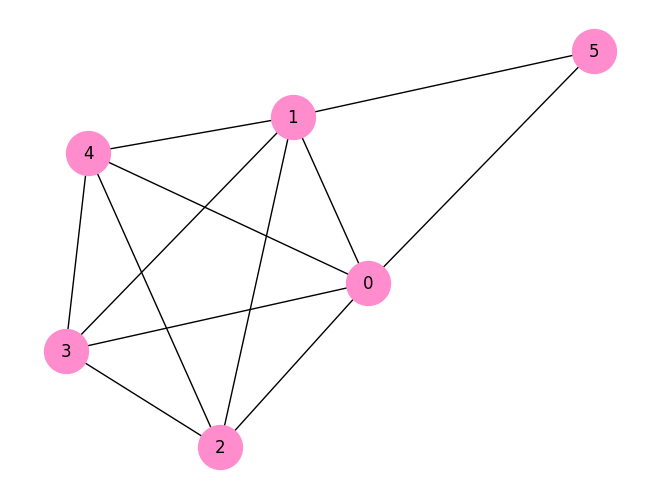

In [27]:
# Test for clustering coefficient
G = nx.complete_graph(5)
# create a non complete graph
G.add_node(5)
G.add_edge(5, 0)
G.add_edge(5, 1)
nx.draw(G, with_labels=True, node_color='#FF8CCD', node_size=1000)
print("Number of triangles:", nx.triangles(G))
print("Degree:", G.degree())
print("Clustering coefficient:", nx.clustering(G))

In [28]:
# Study of homophily in the network
import functools
languages = ['JavaScript', 'Python', 'C++', 'Ruby', 'Java']

user_nodes = [node for node in graph.nodes if node.startswith('u_')]
group_values = lambda x: {k: x.count(k) for k in set(x)}

flatten = lambda l: [item for sublist in l for item in sublist]

# Mark each user their most used language
for user in user_nodes:
    user_repos = graph.nodes[user]['repos']
    
    user_languages = [graph.nodes[repo]['languages'] for repo in user_repos]
    user_languages = group_values(flatten(user_languages))
    user_languages = sorted(user_languages.items(), key=lambda x: x[1], reverse=True)
    
    filtered_languages = [lang for lang in user_languages if lang[0] in languages]
    if (len(filtered_languages) == 0):
        most_used_language = 'Other'
    else:
        most_used_language = filtered_languages[0][0]
    graph.nodes[user]['language'] = most_used_language    

In [29]:
# Creare un arco tra due utenti se hanno almeno un repository in comune
user_edges = []
for u, r in graph.edges:
    repo_subscribers = set(nx.neighbors(graph, r))
    repo_subscribers.remove(u)
    
    user_edges.extend([(u, u0) for u0 in repo_subscribers])

users_graph = nx.Graph()
users_graph.add_edges_from(user_edges)
for u in users_graph.nodes:
    users_graph.nodes[u]['language'] = graph.nodes[u]['language']

nx.attribute_assortativity_coefficient(users_graph, 'language')

0.6341257054097608

In [30]:
# Structural equivalence
def same_repos(r1, r2):
    u_1 = set(nx.neighbors(graph, r1))
    u_2 = set(nx.neighbors(graph, r2))
    
    return u_1 == u_2

repos = [u for u in graph.nodes if u.startswith('r_')]
eq_c = nx.equivalence_classes(repos, same_repos)

# Verify if the relation `same_repos` is an equivalence relation
# since it returns true we create a partition of the repositories
nx.algorithms.community.is_partition(repos, eq_c)

def find_repo_class(r1):
    for c in eq_c:
        if r1 in c:
            return c
        
    # Should never reach this point
    return None

n = len([c for c in eq_c if len(c) <= 1])
m = len([c for c in eq_c if len(c) > 1])

print(n, m)

682 46
